In [1]:
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.ndimage import gaussian_filter
from tifffile.tifffile import imwrite

import caiman as cm
from caiman.utils.visualization import nb_view_patches3d
import caiman.source_extraction.cnmf as cnmf
from caiman.paths import caiman_datadir

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

import bokeh.plotting as bpl
bpl.output_notebook()

logging.basicConfig(format=
                          "%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s",
                    # filename="/tmp/caiman.log",
                    level=logging.WARNING)

2024-02-22 16:23:36.447090: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 16:23:36.447140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 16:23:36.452366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading BokehJS ...

In [3]:
# d = '/jukebox/mcbride/bjarnold/refactor_lukas_imaging_workflow/data/MotionCorrection/BeforeCorrection/240111/240111_Camphor_1U_F1/spontaneous'
# f = '240111_Camphor_1U_F1_00001_00001.tif'
# d = '/jukebox/mcbride/bjarnold/refactor_lukas_imaging_workflow/data/MotionCorrection/CorrectedDataWithin/240111/240111_Camphor_1U_F1/odorEvoked'
# f = '240111_Camphor_1U_F1_00007_00001.tif-mc.tif'


# good images
# 00009
# 00022


x_dim, y_dim = 128, 128

def reshape(Y, z_stacks, x_dim, y_dim):
    # 1st dimension of Y is time X z_stacks, so reshape according to specified z_stacks
    Y_reshaped = np.reshape(Y, (int(Y.shape[0]/z_stacks), z_stacks, x_dim, y_dim))
    # transpose to (n_frames, x, y, z)
    Y_reshaped2 = np.transpose(Y_reshaped, (0, 2, 3, 1))
    return Y_reshaped2

img_num = '00009'

# my results
base_dir_mine = '/jukebox/mcbride/bjarnold/refactor_lukas_imaging_workflow/data/Registration/RegisteredMovies'
# Lukas's results
base_dir_lukas = '/jukebox/mcbride/lukas/CalciumImaging/FCV/Analysis/Registration/RegisteredMovies'

f_mine = f'{base_dir_mine}/240111/240111_Camphor_1U_F1/240111_Camphor_1U_F1_{img_num}_00001.tif-mc.tif.registered.tif'
f_lukas = f'{base_dir_lukas}/240111/240111_Camphor_1U_F1/240111_Camphor_1U_F1_{img_num}_00001.tif-mc.tif.registered.tif'

# Y = cm.load(f'{d}/{f}')
# print(Y.shape)

Y_mine = reshape( cm.load(f_mine), 
                24, x_dim, y_dim)
Y_lukas = reshape(cm.load(f_lukas), 
                24, x_dim, y_dim)






ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

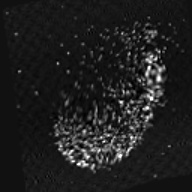

In [7]:
# play movie 4X
cm.concatenate([Y_mine[...,13]]*4, ).play(magnification=1.5, backend='embed_opencv', fr=150) 

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

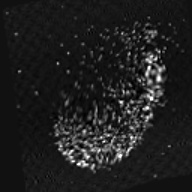

In [10]:
cm.concatenate([Y_lukas[...,13]]*4,  ).play(magnification=1.5, backend='embed_opencv', fr=150)


/usr/people/bjarnold/miniforge3/envs/caiman/lib/python3.11/site-packages/caiman/summary_images.py:209: RuntimeWarning: invalid value encountered in divide
  w_mov = (Y - np.mean(Y, axis=0)) / np.std(Y, axis=0)


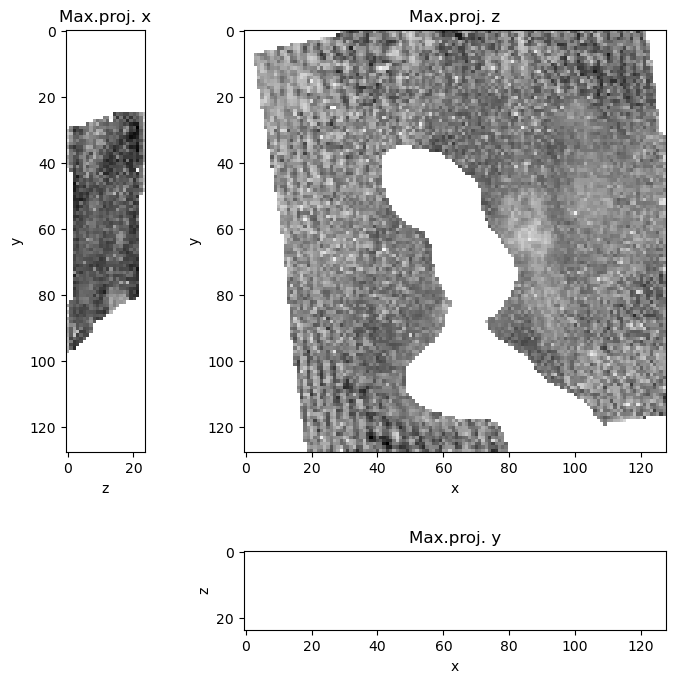

In [9]:

Cn = cm.local_correlations(Y_mine, swap_dim=False)
d1, d2, d3 = Y_mine.shape[1], Y_mine.shape[2], Y_mine.shape[3]
x, y = (int(1.2 * (d1 + d3)), int(1.2 * (d2 + d3)))
scale = 6/x
fig = plt.figure(figsize=(scale*x, scale*y))
axz = fig.add_axes([1-d1/x, 1-d2/y, d1/x, d2/y])
plt.imshow(Cn.max(2), cmap='gray')
plt.title('Max.proj. z')
plt.xlabel('x')
plt.ylabel('y')
axy = fig.add_axes([0, 1-d2/y, d3/x, d2/y])
plt.imshow(Cn.max(0), cmap='gray')
plt.title('Max.proj. x')
plt.xlabel('z')
plt.ylabel('y')
axx = fig.add_axes([1-d1/x, 0, d1/x, d3/y])
plt.imshow(Cn.max(1).T, cmap='gray')
plt.title('Max.proj. y')
plt.xlabel('x')
plt.ylabel('z');
plt.show()

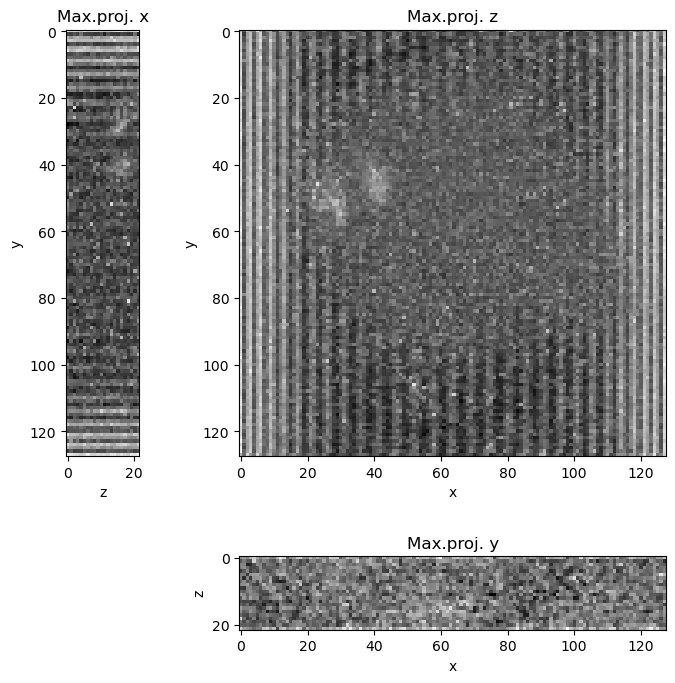

In [ ]:
Cn = cm.local_correlations(Y_reshaped2, swap_dim=False)
d1, d2, d3 = Y_reshaped2.shape[1], Y_reshaped2.shape[2], Y_reshaped2.shape[3]
x, y = (int(1.2 * (d1 + d3)), int(1.2 * (d2 + d3)))
scale = 6/x
fig = plt.figure(figsize=(scale*x, scale*y))
axz = fig.add_axes([1-d1/x, 1-d2/y, d1/x, d2/y])
plt.imshow(Cn.max(2), cmap='gray')
plt.title('Max.proj. z')
plt.xlabel('x')
plt.ylabel('y')
axy = fig.add_axes([0, 1-d2/y, d3/x, d2/y])
plt.imshow(Cn.max(0), cmap='gray')
plt.title('Max.proj. x')
plt.xlabel('z')
plt.ylabel('y')
axx = fig.add_axes([1-d1/x, 0, d1/x, d3/y])
plt.imshow(Cn.max(1).T, cmap='gray')
plt.title('Max.proj. y')
plt.xlabel('x')
plt.ylabel('z');
plt.show()